# Detecting Counterfeit Money
###  Predicting the Note(Bill) is Authentict or not

- Defining the problem
- Collecting the data
- Exploratory data analysis
- Data Preprocessing
- Model Building & Testing

##  Defining the problem
Data were extracted from images that were taken from genuine and forged banknote(curreny bill)-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
#Importing mandatory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##  Collecting the data

Dataset is available on Kaggle you can download from kaggle 
[https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data]   

### loading dataset using Pandas

In [2]:
#Importing Data
df=pd.read_csv('Data/BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


##  Exploratory Data Analysis

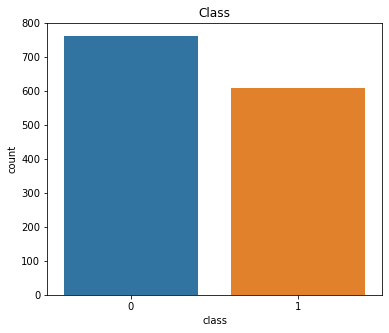

In [6]:
# Checking the number of datapoints per class  
plt.figure(figsize=(6,5))
sns.countplot(x=df['class'])
plt.title("Class")
plt.show()

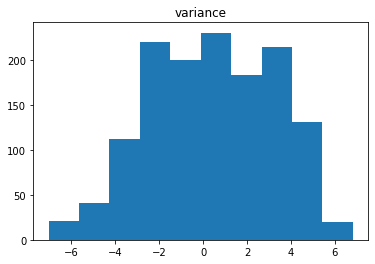

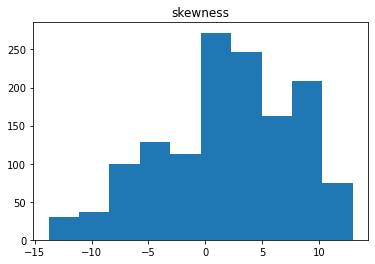

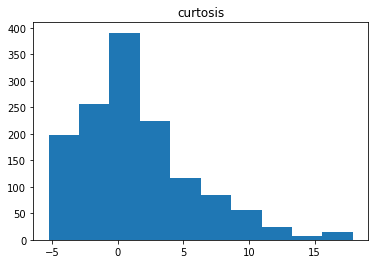

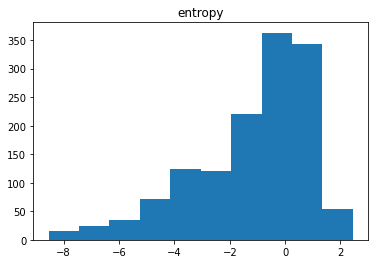

In [7]:
# Plotting histograms for numeric features to understand distributions
for i in df.columns[:-1]:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

## Data Preprocessing
Our data seems perfect so there is no need for feature engineering or feature scaling. In addition to this, there are no null values. Moreover there are not categorical varialables so we can directly proceed to Model builing and testing phase. 

## Model Building & Testing

In [8]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [11]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
#Applying Grid Search to find the best classifier and parameters. 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'KNN' : {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3,4,5,6,7]
            }
        },
        'Logistic': {
            'model': LogisticRegression(),
            'params': {
                'max_iter' : [100,1000,2000,4000],
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini','entropy'],
                'splitter': ['best','random']
            }
        },
        'radnom_forest' : {
            'model': RandomForestClassifier(),
            'params': {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [50, 100, 200],
           }
        },
         'SVM' : {
            'model': SVC(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }
        }   
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)


,model,best_score,best_params
0,KNN,1.000000,{'n_neighbors': 3}
1,Logistic,0.993750,{'max_iter': 100}
2,decision_tree,0.993750,"{'criterion': 'entropy', 'splitter': 'random'}"
3,radnom_forest,0.992708,"{'criterion': 'gini', 'n_estimators': 100}"
4,SVM,0.997917,{'kernel': 'rbf'}


In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
cv = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Average Training Accuracy: {}%'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

Average Training Accuracy: 100.0%
Scores for each cycle: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
## Prediction
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Testing Accuracy is:",score)


Testing Accuracy is: 0.9975728155339806


In [16]:
### Create a Pickle file
import pickle
pickle_out = open("Detecting_Counterfeit_Money.pkl","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

In [17]:
import numpy as np

In [20]:
knn.predict([[2,3,4,1]])


array([0], dtype=int64)